QUESTION1 EASTWEST AIRLINES

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
import warnings
warnings.filterwarnings('ignore' )

In [2]:
from google.colab import files
uploaded=files.upload()

Saving EastWestAirlines.csv to EastWestAirlines.csv


In [3]:
Airlines=pd.read_csv("EastWestAirlines.csv")
Airlines

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1
...,...,...,...,...,...,...,...,...,...,...,...,...
3994,4017,18476,0,1,1,1,8525,4,200,1,1403,1
3995,4018,64385,0,1,1,1,981,5,0,0,1395,1
3996,4019,73597,0,3,1,1,25447,8,0,0,1402,1
3997,4020,54899,0,1,1,1,500,1,500,1,1401,0


In [4]:
Airlines.shape

(3999, 12)

In [5]:
Airlines.isna().sum()


ID#                  0
Balance              0
Qual_miles           0
cc1_miles            0
cc2_miles            0
cc3_miles            0
Bonus_miles          0
Bonus_trans          0
Flight_miles_12mo    0
Flight_trans_12      0
Days_since_enroll    0
Award?               0
dtype: int64

In [6]:
Airlines.describe()

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
count,3999.000000,3.999000e+03,3999.000000,3999.000000,3999.000000,3999.000000,3999.000000,3999.00000,3999.000000,3999.000000,3999.00000,3999.000000
mean,2014.819455,7.360133e+04,144.114529,2.059515,1.014504,1.012253,17144.846212,11.60190,460.055764,1.373593,4118.55939,0.370343
std,1160.764358,1.007757e+05,773.663804,1.376919,0.147650,0.195241,24150.967826,9.60381,1400.209171,3.793172,2065.13454,0.482957
min,1.000000,0.000000e+00,0.000000,1.000000,1.000000,1.000000,0.000000,0.00000,0.000000,0.000000,2.00000,0.000000
25%,1010.500000,1.852750e+04,0.000000,1.000000,1.000000,1.000000,1250.000000,3.00000,0.000000,0.000000,2330.00000,0.000000
50%,2016.000000,4.309700e+04,0.000000,1.000000,1.000000,1.000000,7171.000000,12.00000,0.000000,0.000000,4096.00000,0.000000
75%,3020.500000,9.240400e+04,0.000000,3.000000,1.000000,1.000000,23800.500000,17.00000,311.000000,1.000000,5790.50000,1.000000
max,4021.000000,1.704838e+06,11148.000000,5.000000,3.000000,5.000000,263685.000000,86.00000,30817.000000,53.000000,8296.00000,1.000000


In [7]:
#Normalisation of function
def norm_func(i):
       x = (i-i.min())/(i.max()-i.min()),
       return (x)

In [8]:
# Normalized data frame (considering the numerical part of data)
df_norm = norm_func(Airlines.iloc[:,1:])
df_norm

(       Balance  Qual_miles  cc1_miles  cc2_miles  cc3_miles  Bonus_miles  \
 0     0.016508         0.0       0.00        0.0        0.0     0.000660   
 1     0.011288         0.0       0.00        0.0        0.0     0.000815   
 2     0.024257         0.0       0.00        0.0        0.0     0.015636   
 3     0.008667         0.0       0.00        0.0        0.0     0.001896   
 4     0.057338         0.0       0.75        0.0        0.0     0.164211   
 ...        ...         ...        ...        ...        ...          ...   
 3994  0.010837         0.0       0.00        0.0        0.0     0.032330   
 3995  0.037766         0.0       0.00        0.0        0.0     0.003720   
 3996  0.043169         0.0       0.50        0.0        0.0     0.096505   
 3997  0.032202         0.0       0.00        0.0        0.0     0.001896   
 3998  0.001769         0.0       0.00        0.0        0.0     0.000000   
 
       Bonus_trans  Flight_miles_12mo  Flight_trans_12  Days_since_enroll 

In [9]:
Airlines.describe()

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
count,3999.000000,3.999000e+03,3999.000000,3999.000000,3999.000000,3999.000000,3999.000000,3999.00000,3999.000000,3999.000000,3999.00000,3999.000000
mean,2014.819455,7.360133e+04,144.114529,2.059515,1.014504,1.012253,17144.846212,11.60190,460.055764,1.373593,4118.55939,0.370343
std,1160.764358,1.007757e+05,773.663804,1.376919,0.147650,0.195241,24150.967826,9.60381,1400.209171,3.793172,2065.13454,0.482957
min,1.000000,0.000000e+00,0.000000,1.000000,1.000000,1.000000,0.000000,0.00000,0.000000,0.000000,2.00000,0.000000
25%,1010.500000,1.852750e+04,0.000000,1.000000,1.000000,1.000000,1250.000000,3.00000,0.000000,0.000000,2330.00000,0.000000
50%,2016.000000,4.309700e+04,0.000000,1.000000,1.000000,1.000000,7171.000000,12.00000,0.000000,0.000000,4096.00000,0.000000
75%,3020.500000,9.240400e+04,0.000000,3.000000,1.000000,1.000000,23800.500000,17.00000,311.000000,1.000000,5790.50000,1.000000
max,4021.000000,1.704838e+06,11148.000000,5.000000,3.000000,5.000000,263685.000000,86.00000,30817.000000,53.000000,8296.00000,1.000000


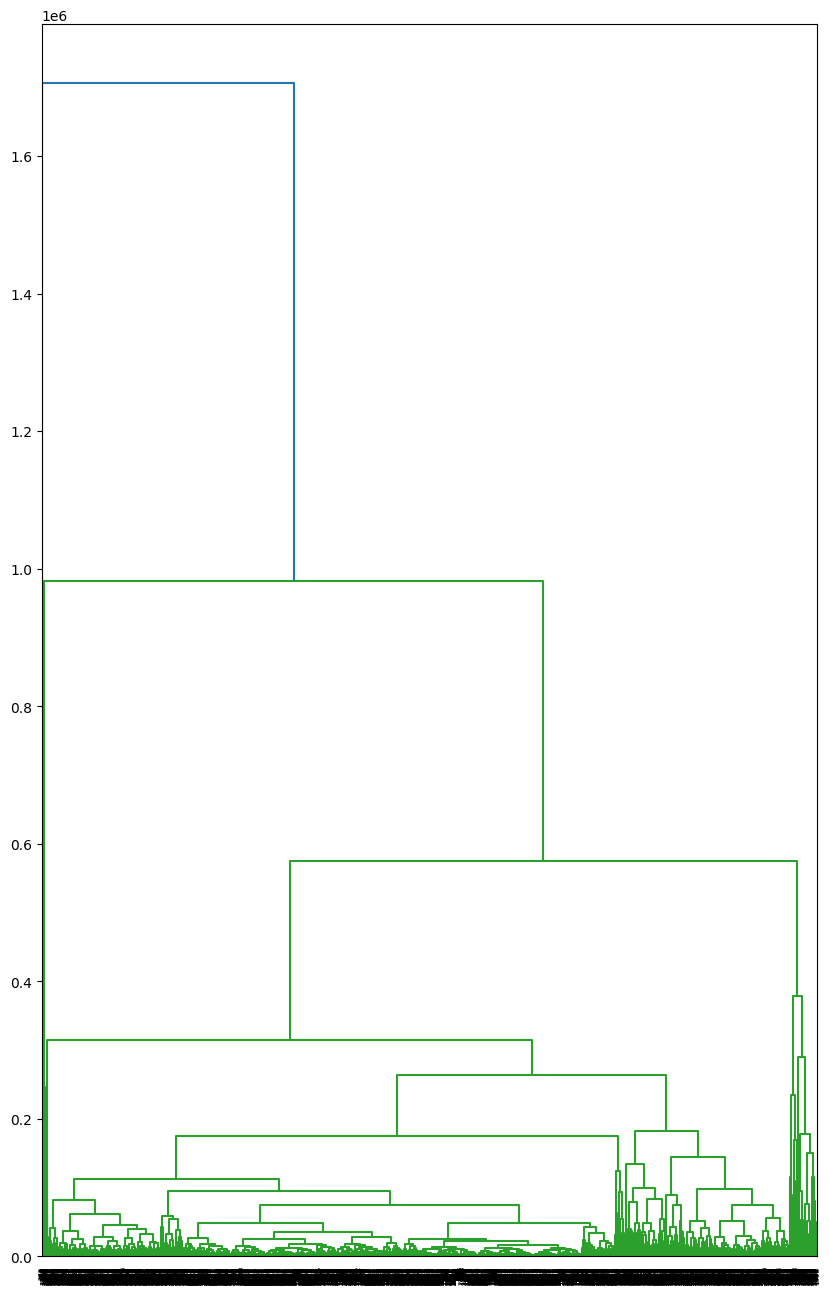

In [10]:
# create dendogram
plt.figure(figsize=(10, 16)) 
dendrogram = sch.dendrogram(sch.linkage(Airlines, method='complete'))


In [11]:
# create clusters
hc = AgglomerativeClustering(n_clusters=5, affinity ='euclidean', linkage ='complete')

In [12]:
# save clusters for chart
y_hc = hc.fit_predict(Airlines)
Clusters=pd.DataFrame(y_hc,columns=['Clusters'])
Clusters

,Clusters
0,1
1,1
2,1
3,1
4,1
...,...
3994,1
3995,1
3996,1
3997,1


In [13]:
 y_hc

array([1, 1, 1, ..., 1, 1, 1])

In [14]:
Airlines['h_clusterid']=y_hc
Airlines.drop(0)

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,h_clusterid
1,2,19244,0,1,1,1,215,2,0,0,6968,0,1
2,3,41354,0,1,1,1,4123,4,0,0,7034,0,1
3,4,14776,0,1,1,1,500,1,0,0,6952,0,1
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1,1
5,6,16420,0,1,1,1,0,0,0,0,6942,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3994,4017,18476,0,1,1,1,8525,4,200,1,1403,1,1
3995,4018,64385,0,1,1,1,981,5,0,0,1395,1,1
3996,4019,73597,0,3,1,1,25447,8,0,0,1402,1,1
3997,4020,54899,0,1,1,1,500,1,500,1,1401,0,1


In [15]:
Airlines.head()

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,h_clusterid
0,1,28143,0,1,1,1,174,1,0,0,7000,0,1
1,2,19244,0,1,1,1,215,2,0,0,6968,0,1
2,3,41354,0,1,1,1,4123,4,0,0,7034,0,1
3,4,14776,0,1,1,1,500,1,0,0,6952,0,1
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1,1


In [16]:
Airlines1 = pd.concat([Airlines,Clusters], axis=1)
Airlines1

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,h_clusterid,Clusters
0,1,28143,0,1,1,1,174,1,0,0,7000,0,1,1
1,2,19244,0,1,1,1,215,2,0,0,6968,0,1,1
2,3,41354,0,1,1,1,4123,4,0,0,7034,0,1,1
3,4,14776,0,1,1,1,500,1,0,0,6952,0,1,1
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3994,4017,18476,0,1,1,1,8525,4,200,1,1403,1,1,1
3995,4018,64385,0,1,1,1,981,5,0,0,1395,1,1,1
3996,4019,73597,0,3,1,1,25447,8,0,0,1402,1,1,1
3997,4020,54899,0,1,1,1,500,1,500,1,1401,0,1,1


In [17]:
Airlines1.sort_values('h_clusterid')

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,h_clusterid,Clusters
629,638,747983,0,4,1,1,26117,15,50,1,6427,1,0,0
186,190,707079,0,4,1,1,57173,40,3450,12,7523,1,0,0
318,322,766419,0,1,1,1,11398,3,398,1,7162,1,0,0
823,833,765738,0,5,1,1,62133,14,0,0,6112,1,0,0
313,317,714717,0,5,1,1,119162,20,1750,4,7183,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
275,279,1704838,0,1,1,1,17108,32,4823,23,7283,1,3,3
488,494,1199220,2919,1,1,1,3800,19,3300,18,8023,1,4,4
481,487,1125076,0,3,1,1,23046,14,0,0,8107,0,4,4
220,224,1302051,2706,5,1,1,90653,32,3050,7,7467,1,4,4


K-MEANS

In [18]:
# Standardisation function 
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_Airlines = scaler.fit_transform(Airlines.iloc[:,1:])

In [19]:
scaled_Airlines

array([[-4.51140783e-01, -1.86298687e-01, -7.69578406e-01, ...,
         1.39545434e+00, -7.66919299e-01, -1.48457773e-01],
       [-5.39456874e-01, -1.86298687e-01, -7.69578406e-01, ...,
         1.37995704e+00, -7.66919299e-01, -1.48457773e-01],
       [-3.20031232e-01, -1.86298687e-01, -7.69578406e-01, ...,
         1.41192021e+00, -7.66919299e-01, -1.48457773e-01],
       ...,
       [-4.29480975e-05, -1.86298687e-01,  6.83121167e-01, ...,
        -1.31560393e+00,  1.30391816e+00, -1.48457773e-01],
       [-1.85606976e-01, -1.86298687e-01, -7.69578406e-01, ...,
        -1.31608822e+00, -7.66919299e-01, -1.48457773e-01],
       [-7.00507951e-01, -1.86298687e-01, -7.69578406e-01, ...,
        -1.31754109e+00, -7.66919299e-01, -1.48457773e-01]])

In [20]:
kmeans = KMeans(n_clusters=4,random_state=0)
predict=kmeans.fit_predict(scaled_Airlines)

In [21]:
predict

array([1, 1, 1, ..., 0, 1, 1], dtype=int32)

In [22]:
kmeans.inertia_

30919.593637968

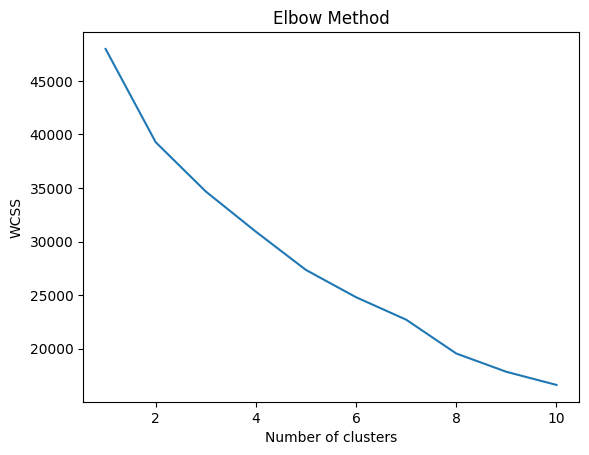

In [23]:
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i,random_state=0)
    kmeans.fit(scaled_Airlines)
    wcss.append(kmeans.inertia_)
    
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [24]:
#Build Cluster algorithm
clusters_new = KMeans(3, random_state=42)
clusters_new.fit(scaled_Airlines)

KMeans(n_clusters=3, random_state=42)

In [25]:
dir(clusters_new)

['__abstractmethods__',
 '__annotations__',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__slots__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_abc_impl',
 '_algorithm',
 '_check_feature_names',
 '_check_mkl_vcomp',
 '_check_n_features',
 '_check_params_vs_input',
 '_check_test_data',
 '_estimator_type',
 '_get_param_names',
 '_get_tags',
 '_init_centroids',
 '_more_tags',
 '_n_features_out',
 '_n_init',
 '_n_threads',
 '_parameter_constraints',
 '_repr_html_',
 '_repr_html_inner',
 '_repr_mimebundle_',
 '_sklearn_auto_wrap_output_keys',
 '_tol',
 '_transform',
 '_validate_center_shape',
 '_validate_data',
 '_validate_params',
 '_warn_mkl_vcomp',
 'algorithm',
 'cluster_

In [26]:
clusters_new.labels_

array([2, 2, 2, ..., 1, 2, 2], dtype=int32)

In [27]:
#Assign clusters to the data set
Airlines['clusterid_new']= clusters_new.labels_

In [28]:
#these are the standardized values
clusters_new.cluster_centers_

array([[ 1.33417273,  1.13651776,  0.16926733,  0.11793711, -0.00827167,
         0.7141248 ,  1.55035579,  3.20816092,  3.43993088,  0.31660965,
         0.89635972,  1.17737237],
       [ 0.41745463, -0.05835977,  1.21366722, -0.0818409 ,  0.12741582,
         0.94949372,  0.75428829, -0.10314985, -0.11233561,  0.36929864,
         0.58021144,  0.08197927],
       [-0.29862005, -0.05496018, -0.59702797,  0.03080431, -0.06077493,
        -0.50959494, -0.47668354, -0.1848101 , -0.19732628, -0.2010434 ,
        -0.3450224 , -0.12555145]])

In [29]:
Airlines.groupby('clusterid_new').agg(['mean']).reset_index()

,clusterid_new,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,h_clusterid
,,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean
0,0,1683.632979,208036.659574,1023.287234,2.292553,1.031915,1.010638,34389.494681,26.489362,4951.590426,14.420213,4772.319149,0.803191,1.292553
1,1,1602.556094,115665.334948,98.969330,3.730428,1.002421,1.037127,40073.171106,18.845036,315.642454,0.947538,4881.115416,0.650525,1.050847
2,2,2237.625583,43511.456843,101.599145,1.237558,1.019051,1.000389,4839.174184,7.024495,201.315319,0.625194,3703.429627,0.203733,1.005054


In [30]:
Airlines[Airlines['clusterid_new']==3]

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,h_clusterid,clusterid_new


DBSCAN

In [31]:
print(Airlines.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3999 entries, 0 to 3998
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   ID#                3999 non-null   int64
 1   Balance            3999 non-null   int64
 2   Qual_miles         3999 non-null   int64
 3   cc1_miles          3999 non-null   int64
 4   cc2_miles          3999 non-null   int64
 5   cc3_miles          3999 non-null   int64
 6   Bonus_miles        3999 non-null   int64
 7   Bonus_trans        3999 non-null   int64
 8   Flight_miles_12mo  3999 non-null   int64
 9   Flight_trans_12    3999 non-null   int64
 10  Days_since_enroll  3999 non-null   int64
 11  Award?             3999 non-null   int64
 12  h_clusterid        3999 non-null   int64
 13  clusterid_new      3999 non-null   int32
dtypes: int32(1), int64(13)
memory usage: 421.9 KB
None


In [32]:
Airlines.head()

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,h_clusterid,clusterid_new
0,1,28143,0,1,1,1,174,1,0,0,7000,0,1,2
1,2,19244,0,1,1,1,215,2,0,0,6968,0,1,2
2,3,41354,0,1,1,1,4123,4,0,0,7034,0,1,2
3,4,14776,0,1,1,1,500,1,0,0,6952,0,1,2
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1,1,1


In [33]:
array=Airlines.values
array


array([[    1, 28143,     0, ...,     0,     1,     2],
       [    2, 19244,     0, ...,     0,     1,     2],
       [    3, 41354,     0, ...,     0,     1,     2],
       ...,
       [ 4019, 73597,     0, ...,     1,     1,     1],
       [ 4020, 54899,     0, ...,     0,     1,     2],
       [ 4021,  3016,     0, ...,     0,     1,     2]])

In [34]:
stscaler=StandardScaler()
stscaler
X=stscaler.fit_transform(array)

In [35]:
X

array([[-1.73512503e+00, -4.51140783e-01, -1.86298687e-01, ...,
        -7.66919299e-01, -1.48457773e-01,  6.97978594e-01],
       [-1.73426342e+00, -5.39456874e-01, -1.86298687e-01, ...,
        -7.66919299e-01, -1.48457773e-01,  6.97978594e-01],
       [-1.73340181e+00, -3.20031232e-01, -1.86298687e-01, ...,
        -7.66919299e-01, -1.48457773e-01,  6.97978594e-01],
       ...,
       [ 1.72682006e+00, -4.29480975e-05, -1.86298687e-01, ...,
         1.30391816e+00, -1.48457773e-01, -1.03032877e+00],
       [ 1.72768167e+00, -1.85606976e-01, -1.86298687e-01, ...,
        -7.66919299e-01, -1.48457773e-01,  6.97978594e-01],
       [ 1.72854328e+00, -7.00507951e-01, -1.86298687e-01, ...,
        -7.66919299e-01, -1.48457773e-01,  6.97978594e-01]])

In [36]:
dbscan=DBSCAN(eps=4,min_samples=15)
dbscan.fit_predict(X)

array([0, 0, 0, ..., 0, 0, 0])

In [37]:
#Noisy samples are given the label -1.
dbscan.labels_

array([0, 0, 0, ..., 0, 0, 0])

In [38]:
cl=pd.DataFrame(dbscan.labels_,columns=['cluster'])
cl

,cluster
0,0
1,0
2,0
3,0
4,0
...,...
3994,0
3995,0
3996,0
3997,0


In [39]:
Airlines['DBSCAN_labels'] = dbscan.labels_
Airlines.head()

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,h_clusterid,clusterid_new,DBSCAN_labels
0,1,28143,0,1,1,1,174,1,0,0,7000,0,1,2,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0,1,2,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0,1,2,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0,1,2,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1,1,1,0


In [40]:
clustered = pd.concat([Airlines,cl],axis=1)

In [41]:
clustered

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,h_clusterid,clusterid_new,DBSCAN_labels,cluster
0,1,28143,0,1,1,1,174,1,0,0,7000,0,1,2,0,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0,1,2,0,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0,1,2,0,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0,1,2,0,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3994,4017,18476,0,1,1,1,8525,4,200,1,1403,1,1,2,0,0
3995,4018,64385,0,1,1,1,981,5,0,0,1395,1,1,2,0,0
3996,4019,73597,0,3,1,1,25447,8,0,0,1402,1,1,1,0,0
3997,4020,54899,0,1,1,1,500,1,500,1,1401,0,1,2,0,0


In [42]:
clustered[clustered['cluster']==-1]

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,h_clusterid,clusterid_new,DBSCAN_labels,cluster
8,9,443003,0,3,2,1,1753,43,3850,12,6948,1,2,0,-1,-1
43,44,619393,0,3,1,1,15008,14,0,0,7819,1,0,1,-1,-1
87,90,609477,0,3,1,1,21422,22,1200,8,6820,0,0,1,-1,-1
106,109,96627,1182,1,1,3,49059,26,2300,9,6738,1,1,0,-1,-1
117,120,969559,0,1,1,1,2500,3,1000,2,7718,1,0,1,-1,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3611,3634,37300,0,1,3,1,23760,19,0,0,676,0,1,2,-1,-1
3772,3795,822321,0,5,1,1,138334,26,600,2,3288,1,0,1,-1,-1
3779,3802,35850,0,1,3,1,17759,18,0,0,3439,0,1,2,-1,-1
3788,3811,374613,0,1,2,1,23592,31,5000,14,3463,1,2,0,-1,-1


In [43]:
Airlines.groupby('DBSCAN_labels').agg(['mean'])

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,h_clusterid,clusterid_new
,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean
DBSCAN_labels,,,,,,,,,,,,,,
-1,1489.895833,335719.760417,1360.718750,2.781250,1.34375,1.510417,58650.062500,26.062500,3383.489583,9.062500,5152.739583,0.760417,1.09375,0.708333
0,2052.187966,58081.016773,109.913206,2.012247,1.00000,1.000000,15263.963259,11.020767,369.294995,1.128328,4046.301651,0.351438,1.00000,1.640575
1,1198.360656,352218.336066,269.270492,3.139344,1.00000,1.000000,43628.786885,17.450820,1002.262295,2.991803,5614.475410,0.655738,2.00000,0.860656
2,2400.600000,39187.040000,0.000000,1.120000,2.00000,1.000000,11107.040000,14.840000,224.000000,0.800000,3703.240000,0.320000,1.00000,1.920000


2. CRIME DATASET

In [44]:
from google.colab import files
uploaded=files.upload()

Saving crime_data.csv to crime_data.csv


In [45]:
crime=pd.read_csv("crime_data.csv")
crime

,Unnamed: 0,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6
5,Colorado,7.9,204,78,38.7
6,Connecticut,3.3,110,77,11.1
7,Delaware,5.9,238,72,15.8
8,Florida,15.4,335,80,31.9
9,Georgia,17.4,211,60,25.8


In [46]:
crime.shape

(50, 5)

In [47]:
crime.isna().sum()

Unnamed: 0    0
Murder        0
Assault       0
UrbanPop      0
Rape          0
dtype: int64

In [48]:
crime.describe()

,Murder,Assault,UrbanPop,Rape
count,50.00000,50.000000,50.000000,50.000000
mean,7.78800,170.760000,65.540000,21.232000
std,4.35551,83.337661,14.474763,9.366385
min,0.80000,45.000000,32.000000,7.300000
25%,4.07500,109.000000,54.500000,15.075000
50%,7.25000,159.000000,66.000000,20.100000
75%,11.25000,249.000000,77.750000,26.175000
max,17.40000,337.000000,91.000000,46.000000


In [49]:
#Normalisation of function
def norm_func(i):
       x = (i-i.min())/(i.max()-i.min()),
       return (x)

In [50]:
# Normalized data frame (considering the numerical part of data)
df_c= norm_func(crime.iloc[:,1:])
df_c

(      Murder   Assault  UrbanPop      Rape
 0   0.746988  0.654110  0.440678  0.359173
 1   0.554217  0.746575  0.271186  0.961240
 2   0.439759  0.852740  0.813559  0.612403
 3   0.481928  0.496575  0.305085  0.315245
 4   0.493976  0.791096  1.000000  0.860465
 5   0.427711  0.544521  0.779661  0.811370
 6   0.150602  0.222603  0.762712  0.098191
 7   0.307229  0.660959  0.677966  0.219638
 8   0.879518  0.993151  0.813559  0.635659
 9   1.000000  0.568493  0.474576  0.478036
 10  0.271084  0.003425  0.864407  0.333333
 11  0.108434  0.256849  0.372881  0.178295
 12  0.578313  0.698630  0.864407  0.431525
 13  0.385542  0.232877  0.559322  0.354005
 14  0.084337  0.037671  0.423729  0.103359
 15  0.313253  0.239726  0.576271  0.276486
 16  0.536145  0.219178  0.338983  0.232558
 17  0.879518  0.698630  0.576271  0.385013
 18  0.078313  0.130137  0.322034  0.012920
 19  0.632530  0.873288  0.593220  0.529716
 20  0.216867  0.356164  0.898305  0.232558
 21  0.680723  0.719178  0.71186

In [51]:
crime.describe()


,Murder,Assault,UrbanPop,Rape
count,50.00000,50.000000,50.000000,50.000000
mean,7.78800,170.760000,65.540000,21.232000
std,4.35551,83.337661,14.474763,9.366385
min,0.80000,45.000000,32.000000,7.300000
25%,4.07500,109.000000,54.500000,15.075000
50%,7.25000,159.000000,66.000000,20.100000
75%,11.25000,249.000000,77.750000,26.175000
max,17.40000,337.000000,91.000000,46.000000


In [52]:
crime1=crime.drop(['Unnamed: 0'],axis=1)
crime1

,Murder,Assault,UrbanPop,Rape
0,13.2,236,58,21.2
1,10.0,263,48,44.5
2,8.1,294,80,31.0
3,8.8,190,50,19.5
4,9.0,276,91,40.6
5,7.9,204,78,38.7
6,3.3,110,77,11.1
7,5.9,238,72,15.8
8,15.4,335,80,31.9
9,17.4,211,60,25.8


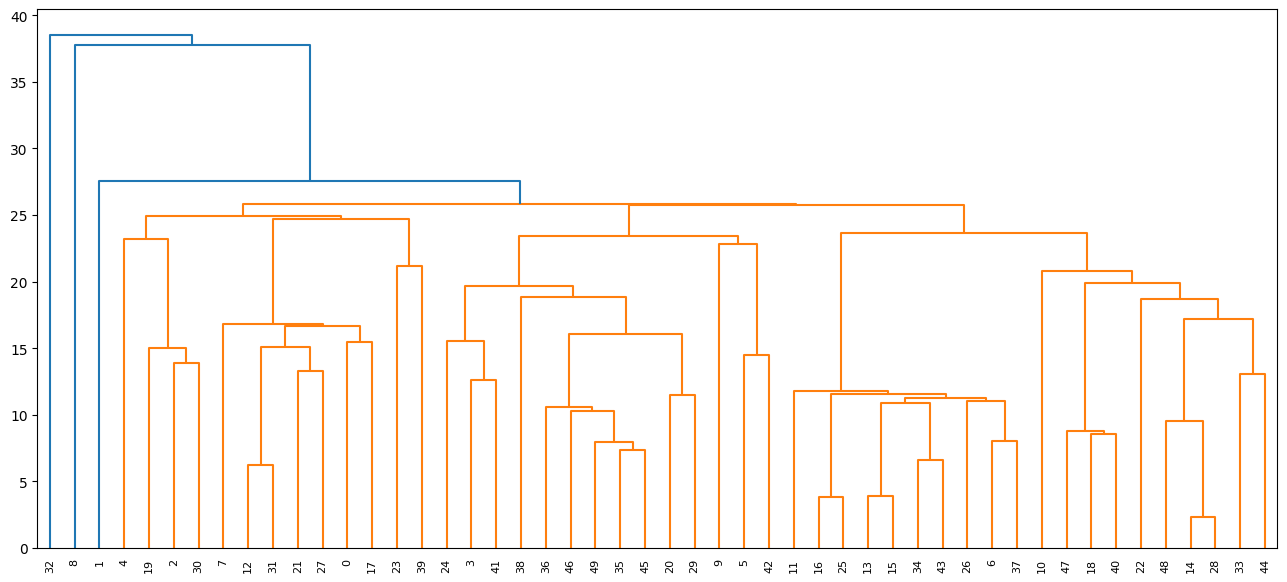

In [53]:
# create dendogram
plt.figure(figsize=(16,7))
dendrogram = sch.dendrogram(sch.linkage(crime1, method='single'))


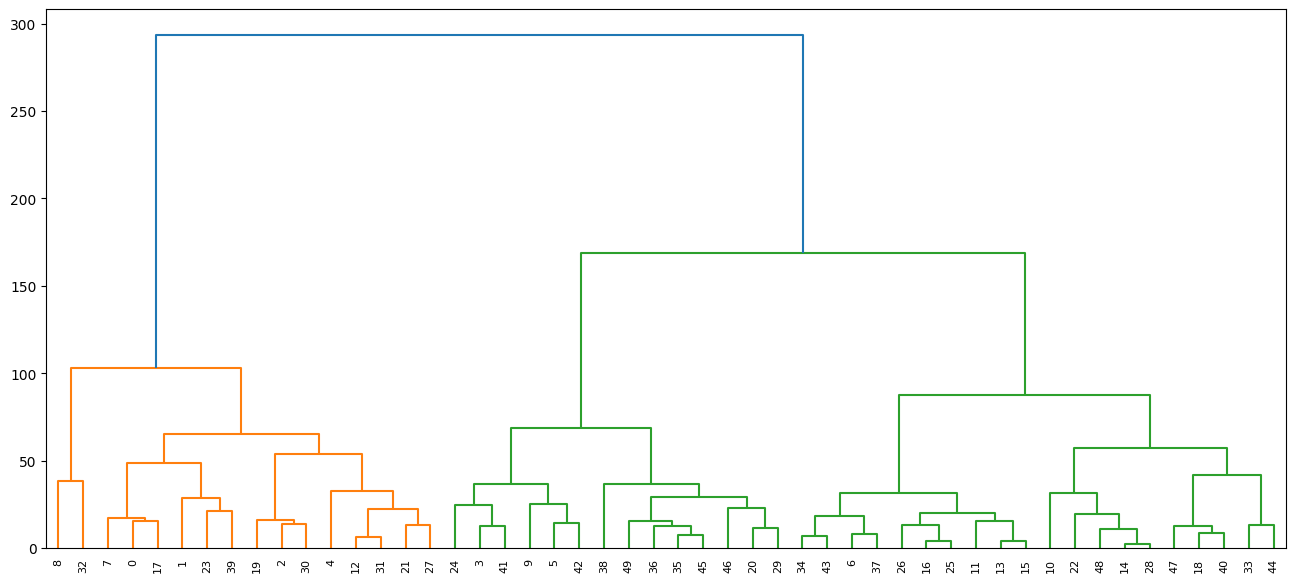

In [54]:
plt.figure(figsize=(16,7))
dendrogram = sch.dendrogram(sch.linkage(crime1, method='complete'))


In [55]:
# create clusters
hc1 = AgglomerativeClustering(n_clusters=5, affinity ='euclidean', linkage ='complete')

In [56]:
# save clusters for chart
y_hc1 = hc1.fit_predict(crime1)
Clusters=pd.DataFrame(y_hc1,columns=['Clusters'])
Clusters

,Clusters
0,1
1,1
2,1
3,0
4,1
5,0
6,4
7,1
8,3
9,0


In [57]:
y_hc1

array([1, 1, 1, 0, 1, 0, 4, 1, 3, 0, 2, 4, 1, 4, 2, 4, 4, 1, 2, 1, 0, 1,
       2, 1, 0, 4, 4, 1, 2, 0, 1, 1, 3, 2, 4, 0, 0, 4, 0, 1, 2, 0, 0, 4,
       2, 0, 0, 2, 2, 0])

In [58]:
crime1['h1_clusterid']=y_hc1

In [59]:
crime1

,Murder,Assault,UrbanPop,Rape,h1_clusterid
0,13.2,236,58,21.2,1
1,10.0,263,48,44.5,1
2,8.1,294,80,31.0,1
3,8.8,190,50,19.5,0
4,9.0,276,91,40.6,1
5,7.9,204,78,38.7,0
6,3.3,110,77,11.1,4
7,5.9,238,72,15.8,1
8,15.4,335,80,31.9,3
9,17.4,211,60,25.8,0


In [60]:
crime2 = pd.concat([crime1,Clusters], axis=1)
crime2

,Murder,Assault,UrbanPop,Rape,h1_clusterid,Clusters
0,13.2,236,58,21.2,1,1
1,10.0,263,48,44.5,1,1
2,8.1,294,80,31.0,1,1
3,8.8,190,50,19.5,0,0
4,9.0,276,91,40.6,1,1
5,7.9,204,78,38.7,0,0
6,3.3,110,77,11.1,4,4
7,5.9,238,72,15.8,1,1
8,15.4,335,80,31.9,3,3
9,17.4,211,60,25.8,0,0


In [61]:
crime2.sort_values('h1_clusterid')

,Murder,Assault,UrbanPop,Rape,h1_clusterid,Clusters
24,9.0,178,70,28.2,0,0
46,4.0,145,73,26.2,0,0
45,8.5,156,63,20.7,0,0
42,12.7,201,80,25.5,0,0
41,13.2,188,59,26.9,0,0
38,3.4,174,87,8.3,0,0
36,4.9,159,67,29.3,0,0
35,6.6,151,68,20.0,0,0
29,7.4,159,89,18.8,0,0
20,4.4,149,85,16.3,0,0


KMEANS

In [62]:
# Standardisation function 
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_crime = scaler.fit_transform(crime.iloc[:,1:])

In [63]:
scaled_crime

array([[ 1.25517927,  0.79078716, -0.52619514, -0.00345116],
       [ 0.51301858,  1.11805959, -1.22406668,  2.50942392],
       [ 0.07236067,  1.49381682,  1.00912225,  1.05346626],
       [ 0.23470832,  0.23321191, -1.08449238, -0.18679398],
       [ 0.28109336,  1.2756352 ,  1.77678094,  2.08881393],
       [ 0.02597562,  0.40290872,  0.86954794,  1.88390137],
       [-1.04088037, -0.73648418,  0.79976079, -1.09272319],
       [-0.43787481,  0.81502956,  0.45082502, -0.58583422],
       [ 1.76541475,  1.99078607,  1.00912225,  1.1505301 ],
       [ 2.22926518,  0.48775713, -0.38662083,  0.49265293],
       [-0.57702994, -1.51224105,  1.21848371, -0.11129987],
       [-1.20322802, -0.61527217, -0.80534376, -0.75839217],
       [ 0.60578867,  0.94836277,  1.21848371,  0.29852525],
       [-0.13637203, -0.70012057, -0.03768506, -0.0250209 ],
       [-1.29599811, -1.39102904, -0.5959823 , -1.07115345],
       [-0.41468229, -0.67587817,  0.03210209, -0.34856705],
       [ 0.44344101, -0.

In [64]:
kmeans = KMeans(n_clusters=5,random_state=0)
predict=kmeans.fit_predict(scaled_crime)

In [65]:
predict

array([0, 4, 4, 3, 4, 4, 2, 3, 4, 0, 2, 1, 4, 3, 1, 3, 3, 0, 1, 4, 2, 4,
       3, 0, 4, 3, 3, 4, 1, 2, 4, 4, 0, 1, 3, 3, 3, 3, 2, 0, 1, 0, 4, 2,
       1, 3, 3, 1, 1, 3], dtype=int32)

In [66]:
kmeans.inertia_

50.52026552535068

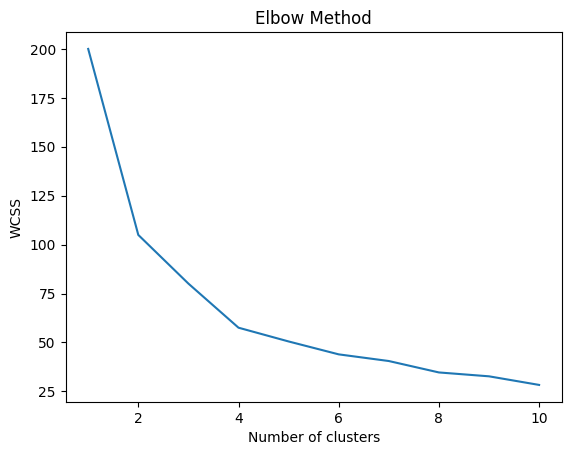

In [67]:
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i,random_state=0)
    kmeans.fit(scaled_crime)
    wcss.append(kmeans.inertia_)
    
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [68]:
#Build Cluster algorithm
clusters_new1 = KMeans(3, random_state=42)
clusters_new1.fit(scaled_crime)

KMeans(n_clusters=3, random_state=42)

In [69]:
dir(clusters_new1)


['__abstractmethods__',
 '__annotations__',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__slots__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_abc_impl',
 '_algorithm',
 '_check_feature_names',
 '_check_mkl_vcomp',
 '_check_n_features',
 '_check_params_vs_input',
 '_check_test_data',
 '_estimator_type',
 '_get_param_names',
 '_get_tags',
 '_init_centroids',
 '_more_tags',
 '_n_features_out',
 '_n_init',
 '_n_threads',
 '_parameter_constraints',
 '_repr_html_',
 '_repr_html_inner',
 '_repr_mimebundle_',
 '_sklearn_auto_wrap_output_keys',
 '_tol',
 '_transform',
 '_validate_center_shape',
 '_validate_data',
 '_validate_params',
 '_warn_mkl_vcomp',
 'algorithm',
 'cluster_

In [70]:
clusters_new1.labels_

array([1, 1, 1, 2, 1, 1, 0, 0, 1, 1, 0, 2, 1, 0, 2, 0, 2, 1, 2, 1, 0, 1,
       2, 1, 1, 2, 2, 1, 2, 0, 1, 1, 1, 2, 0, 0, 0, 0, 0, 1, 2, 1, 1, 0,
       2, 0, 0, 2, 2, 0], dtype=int32)

In [71]:
#Assign clusters to the data set
crime['clusterid_new1']= clusters_new1.labels_

In [72]:
#these are the standardized values
clusters_new1.cluster_centers_

array([[-0.49440658, -0.3864845 ,  0.58167593, -0.26431024],
       [ 1.01513667,  1.02412028,  0.19959126,  0.85556386],
       [-0.88515915, -1.0213324 , -0.94990286, -0.92016524]])

In [73]:
crime.groupby('clusterid_new1').agg(['mean']).reset_index()

,clusterid_new1,Murder,Assault,UrbanPop,Rape
,,mean,mean,mean,mean
0,0,5.656250,138.875,73.875000,18.78125
1,1,12.165000,255.250,68.400000,29.16500
2,2,3.971429,86.500,51.928571,12.70000


DBSCAN

In [74]:
print(crime.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Unnamed: 0      50 non-null     object 
 1   Murder          50 non-null     float64
 2   Assault         50 non-null     int64  
 3   UrbanPop        50 non-null     int64  
 4   Rape            50 non-null     float64
 5   clusterid_new1  50 non-null     int32  
dtypes: float64(2), int32(1), int64(2), object(1)
memory usage: 2.3+ KB
None


In [75]:
crime.head()

,Unnamed: 0,Murder,Assault,UrbanPop,Rape,clusterid_new1
0,Alabama,13.2,236,58,21.2,1
1,Alaska,10.0,263,48,44.5,1
2,Arizona,8.1,294,80,31.0,1
3,Arkansas,8.8,190,50,19.5,2
4,California,9.0,276,91,40.6,1


In [76]:
crime.drop(['Unnamed: 0'],axis=1,inplace=True)
crime

,Murder,Assault,UrbanPop,Rape,clusterid_new1
0,13.2,236,58,21.2,1
1,10.0,263,48,44.5,1
2,8.1,294,80,31.0,1
3,8.8,190,50,19.5,2
4,9.0,276,91,40.6,1
5,7.9,204,78,38.7,1
6,3.3,110,77,11.1,0
7,5.9,238,72,15.8,0
8,15.4,335,80,31.9,1
9,17.4,211,60,25.8,1


In [77]:
array=crime.values
array

array([[ 13.2, 236. ,  58. ,  21.2,   1. ],
       [ 10. , 263. ,  48. ,  44.5,   1. ],
       [  8.1, 294. ,  80. ,  31. ,   1. ],
       [  8.8, 190. ,  50. ,  19.5,   2. ],
       [  9. , 276. ,  91. ,  40.6,   1. ],
       [  7.9, 204. ,  78. ,  38.7,   1. ],
       [  3.3, 110. ,  77. ,  11.1,   0. ],
       [  5.9, 238. ,  72. ,  15.8,   0. ],
       [ 15.4, 335. ,  80. ,  31.9,   1. ],
       [ 17.4, 211. ,  60. ,  25.8,   1. ],
       [  5.3,  46. ,  83. ,  20.2,   0. ],
       [  2.6, 120. ,  54. ,  14.2,   2. ],
       [ 10.4, 249. ,  83. ,  24. ,   1. ],
       [  7.2, 113. ,  65. ,  21. ,   0. ],
       [  2.2,  56. ,  57. ,  11.3,   2. ],
       [  6. , 115. ,  66. ,  18. ,   0. ],
       [  9.7, 109. ,  52. ,  16.3,   2. ],
       [ 15.4, 249. ,  66. ,  22.2,   1. ],
       [  2.1,  83. ,  51. ,   7.8,   2. ],
       [ 11.3, 300. ,  67. ,  27.8,   1. ],
       [  4.4, 149. ,  85. ,  16.3,   0. ],
       [ 12.1, 255. ,  74. ,  35.1,   1. ],
       [  2.7,  72. ,  66. ,  14

In [78]:
stscaler=StandardScaler()
stscaler
X2=stscaler.fit_transform(array)
X2

array([[ 1.25517927,  0.79078716, -0.52619514, -0.00345116,  0.05170877],
       [ 0.51301858,  1.11805959, -1.22406668,  2.50942392,  0.05170877],
       [ 0.07236067,  1.49381682,  1.00912225,  1.05346626,  0.05170877],
       [ 0.23470832,  0.23321191, -1.08449238, -0.18679398,  1.34442799],
       [ 0.28109336,  1.2756352 ,  1.77678094,  2.08881393,  0.05170877],
       [ 0.02597562,  0.40290872,  0.86954794,  1.88390137,  0.05170877],
       [-1.04088037, -0.73648418,  0.79976079, -1.09272319, -1.24101046],
       [-0.43787481,  0.81502956,  0.45082502, -0.58583422, -1.24101046],
       [ 1.76541475,  1.99078607,  1.00912225,  1.1505301 ,  0.05170877],
       [ 2.22926518,  0.48775713, -0.38662083,  0.49265293,  0.05170877],
       [-0.57702994, -1.51224105,  1.21848371, -0.11129987, -1.24101046],
       [-1.20322802, -0.61527217, -0.80534376, -0.75839217,  1.34442799],
       [ 0.60578867,  0.94836277,  1.21848371,  0.29852525,  0.05170877],
       [-0.13637203, -0.70012057, -0.0

In [79]:
dbscan=DBSCAN(eps=1,min_samples=4)
dbscan.fit(X2)

DBSCAN(eps=1, min_samples=4)

In [80]:
#Noisy samples are given the label -1
dbscan.labels_

array([ 0, -1, -1, -1, -1, -1,  2, -1, -1, -1, -1,  1, -1,  2,  1,  2,  1,
        0,  1, -1,  3, -1,  1, -1, -1,  1,  1, -1,  1,  3, -1, -1, -1,  1,
        2,  2,  2,  2,  3,  0,  1,  0, -1,  2,  1,  2,  2,  1,  1,  2])

In [81]:
c2=pd.DataFrame(dbscan.labels_,columns=['cluster'])
c2

,cluster
0,0
1,-1
2,-1
3,-1
4,-1
5,-1
6,2
7,-1
8,-1
9,-1


In [82]:
crime['DBSCAN_labels'] = dbscan.labels_
crime.head()

,Murder,Assault,UrbanPop,Rape,clusterid_new1,DBSCAN_labels
0,13.2,236,58,21.2,1,0
1,10.0,263,48,44.5,1,-1
2,8.1,294,80,31.0,1,-1
3,8.8,190,50,19.5,2,-1
4,9.0,276,91,40.6,1,-1


In [83]:
clustered1 = pd.concat([crime,c2],axis=1)

In [84]:

clustered1

,Murder,Assault,UrbanPop,Rape,clusterid_new1,DBSCAN_labels,cluster
0,13.2,236,58,21.2,1,0,0
1,10.0,263,48,44.5,1,-1,-1
2,8.1,294,80,31.0,1,-1,-1
3,8.8,190,50,19.5,2,-1,-1
4,9.0,276,91,40.6,1,-1,-1
5,7.9,204,78,38.7,1,-1,-1
6,3.3,110,77,11.1,0,2,2
7,5.9,238,72,15.8,0,-1,-1
8,15.4,335,80,31.9,1,-1,-1
9,17.4,211,60,25.8,1,-1,-1


In [85]:
crime.groupby('DBSCAN_labels').agg(['mean'])

,Murder,Assault,UrbanPop,Rape,clusterid_new1
,mean,mean,mean,mean,mean
DBSCAN_labels,,,,,
-1,10.900000,243.526316,70.631579,28.736842,0.947368
0,14.050000,238.000000,57.750000,23.200000,1.000000
1,3.600000,78.538462,52.076923,12.176923,2.000000
2,5.827273,132.363636,69.636364,20.100000,0.000000
3,5.066667,160.666667,87.000000,14.466667,0.000000
